In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [60]:
'''
 Since we are dealing with logistic regression,
 the hypothesis is defined as:

                    1
       F(x) = ----------------
                1 + exp^(-x)

 However, its implementation may result in overflow
 if x is too large, then, the version implemented 
 here is more stable with similar results, and is
 defined as:
 
                  exp^(x)
       F(x) = ----------------, if x < 0
                1 + exp^(x) 
                
                    1
       F(x) = ----------------, if x >= 0
                1 + exp^(-x) 
'''
def hypothesis(theta,X,stable=False):
    
    dot = np.dot(X,theta)
    
    #Regular Sigmoid Function        
    if (stable == False):        
        h = 1 / (1 + np.exp(-dot))
    
    else:
    #Stable Sigmoid Function
        num = (dot >= 0).astype(np.float128)
        dot[dot >= 0] = -dot[dot >= 0]	
        exp = np.exp(dot)
        num = np.multiply(num,exp)
        h = num / (1 + exp)
    
    return h

# Apply a multi class classification of the samples
# regarding an optimized theta
# ToDo
def classify_multiclass(theta , X , th, nmodels):
    # inserting the X^0 coeficient
    X = np.insert(X, 0, 1, axis=1)
    
    # Given a theta collection calculate the hyphotesis
    y = hypothesis(theta, X)
    y[y >= th] = 1
    y[y < th] = 0
    X = np.delete(X, 0, axis=1)
    return y

# Given a threshold apply a 
# binary classification of the samples
# regarding an optimized theta
def classify(theta, X, th):
    X = np.insert(X, 0, 1, axis=1)
    y = hypothesis(theta, X)
    y[y >= th] = 1
    y[y < th] = 0
    X = np.delete(X, 0, axis=1)
    return y

def predict(theta,X):
    X = np.insert(X, 0, 1, axis=1)
    y = hypothesis(theta, X)
    X = np.delete(X, 0, axis=1)
    return y



In [57]:
#-----------------------------------
#   Evaluation Metrics and Loss Functions
#-----------------------------------

def cross_entropy_loss(h, y):
    # y.log(h) + (1-log(h) . 1-y)
    # log probability * inverse of the log probabality 
	eps = np.finfo(np.float).eps
	h[h < eps] = eps
	h[h > 1.-eps] = 1.-eps
	return np.multiply(np.log(h),y) + np.multiply((np.log(1-h)),(1-y))

def cost(theta, X, y):
    h = hypothesis(theta, X)
    cost = cross_entropy_loss(h, y)
    mean_cost = cost.sum() / -y.shape[0]
    return mean_cost

def accuracy_score(predY, Y):
    TP = ((predY == Y) & (predY == 1.)).sum()
    TN = ((predY == Y) & (predY == 0.)).sum()
    acc = (TP + TN) / predY.shape[0]
    return acc

def precision_score(predY,Y):
    TP = ((predY == Y) & (predY == 1)).sum()
    FP = ((predY != Y) & (predY == 1)).sum()
    precision = TP / (TP + FP)
    return precision

def recall_score(predY, Y):
    TP = ((predY == Y) & (predY == 1)).sum()
    FN = ((predY != Y) & (predY == 0)).sum()
    recall = TP / (TP + FN)
    return recall

def f1_score(predY, Y, beta):
    precision = precision_score(predY, Y)
    recall = recall_score(predY, Y)
    fscore = (1 + beta * beta) * ((precision * recall) / ((beta * beta * precision) + recall))
    return fscore

In [58]:
#-----------------------------------
#   Gradient Descent
#-----------------------------------

def BGD(X, y, alpha, iterations):

    X = np.insert(X, 0, 1, axis=1)

    nsamples = X.shape[0]
    nfeatures = X.shape[1]
    theta = np.zeros(nfeatures)
    J=[]

    for i in range(iterations):

        h = hypothesis(theta,X)

        error = h - y

        grad = np.dot(X.transpose(),error)/nsamples

        theta = theta - alpha * grad

        J.append(cost(theta,X,y))
#         J.append(error)

    X = np.delete(X,0,axis=1)
    plt.figure()
    plt.plot(J)    
    plt.ylabel('Error')
    plt.xlabel('iterations')
    plt.show()

    return theta, J[iterations-1]


--- X
[[  43   43   43]
 [  31   31   31]
 [  81   81   81]
 ...
 [4600 4600 4600]
 [4100 4100 4100]
 [7200 7200 7200]]

--- y
[0. 0. 0. ... 1. 1. 1.]


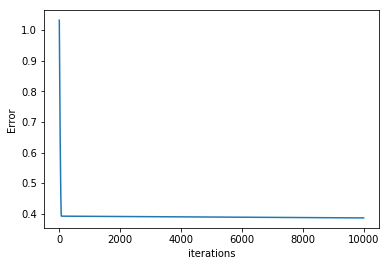


--- Theta
[-0.02409624  0.0006008   0.0006008   0.0006008 ]

--- Error
0.38661647595835424

--- Hypothesis
[0.99410172 0.99880846 0.76879855 0.9999996  0.98456682 0.99999995
 0.99999996 0.99976617 0.9999991  0.99999856 0.65089313 0.99989701
 0.95975023 0.85526501 0.99997766 0.99999997 0.94834934 0.99997068
 0.98183383 0.99997511 0.99999992 0.96422697 0.99999083 0.9999984
 0.96441301 0.91642471 0.9999999  0.99999947 0.99818119 0.99975229
 0.99997315 0.96296253 0.99629368 0.98080994 0.99784224 0.99999547
 0.99997489 0.99867733 0.99383154 0.9999696  0.99999352 0.99997057
 0.99997125 0.99999998 0.99999997 0.98952887 0.9997007  0.99985469
 0.99995672 0.99999734 0.999997   0.53133474 0.99919675 0.99999997
 0.99986284 0.98939733 0.99999898 0.92459493 0.99999384 0.99999911
 0.99937127 0.99736559 0.5083944  0.99655679 0.97464769 0.99952014
 0.99999721 0.97603452 0.99999922 0.9378336  0.9999994  0.99997429
 0.9999959  0.99087339 0.54656101 0.99999616 0.99998839 0.85704079
 0.99999916 0.99991116

In [61]:
#-----------------------------------
#   Logistic Regression - Toy Example
#-----------------------------------

size=5000
size2=size//2
size10=size//10
size102=size10//2

X = np.random.randint(low=1, high=99, size=(size,1))
X = np.concatenate((X, X, X), axis=1)
X = np.multiply(X,np.concatenate((np.full((size2,1),1), np.full((size2,1),100))))

y = np.empty((size))
y[X[:,1] <= 99]=0
y[X[:,1] >= 100]=1

print("\n--- X")
print(X)
print("\n--- y")
print(y)

theta,error = BGD(X, y, 0.00001, 10000)
print("\n--- Theta")
print(theta)
print("\n--- Error")
print(error)


X_val = np.random.randint(low=1, high=9900, size=(size10,1))
X_val = np.concatenate((X_val, X_val, X_val),axis=1)
y_val = np.empty((size10))
y_val[X_val[:,1] <= 99]=0
y_val[X_val[:,1] >= 100]=1


h = predict(theta,X_val)
print("\n--- Hypothesis")
print(h)
predY = classify(theta,X_val,0.7)
print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

acc = accuracy_score(predY, y_val)
pre = precision_score(predY, y_val)
recall = recall_score(predY, y_val)
f = f1_score(predY, y_val, 1)

print("\n--- Accuracy")
print(acc)
print("\n--- Precision")
print(pre)
print("\n--- Recall")
print(recall)
print("\n--- F1Score")
print(f)


In [ ]:
#-----------------------------------
# MultiClass Classification - Toy Example
#-----------------------------------

# Not ready, still has a bug

size=500
size4=size//4
size10=size//10
size104=size10//4
X = np.random.randint(low=0,high=7999, size=(size,1))
X = np.concatenate((X,X,X),axis=1)
y = np.empty((size),dtype=np.float128)
y[X[:,1] <= 1999]=0
y[((X[:,1] <= 3999) & (X[:,1]>1999))]=1
y[((X[:,1] <= 5999) & (X[:,1]>3999))]=2
y[X[:,1]>5999]=3

classes = np.unique(y)
print(classes)
theta = {}

for c in classes:

	cy = np.copy(y)

	cy[y != c] = 0
	cy[y == c] = 1

	theta[c],acc = BGD(X,cy,0.001,500)

X_val = np.random.randint(low=1,high=7999, size=(size10,1))
X_val = np.concatenate((X_val,X_val,X_val),axis=1)
y_val = np.empty((size10))
y_val[X_val[:,1] <= 1999]=0
y_val[((X_val[:,1] <= 3999) & (X_val[:,1]>1999))]=1
y_val[((X_val[:,1] <= 5999) & (X_val[:,1]>3999))]=2
y_val[X_val[:,1]>5999]=3

print("\n--- Theta")
print(theta)

predY, pred = classify_multiclass(theta,X_val)
print("\n--- Hypothesis")
print(pred)
print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

acc = accuracy_score(predY, y_val)
pre = precision_score(predY, y_val)
recall = recall_score(predY, y_val)
f = f1_score(predY, y_val, 1)

print("\n--- Accuracy")
print(acc)
print("\n--- Precision")
print(pre)
print("\n--- Recall")
print(recall)
print("\n--- F1Score")
print(f)